# Mental Health in Tech Industry Analysis 2014-2019
### *author: Celine Ng*
### *April 2024*

# Table of Contents 
1. Notebook Preparation
    1.1 Libraries Installation
    1.2 Data Retrieval
    1.3 Initial Data Cleaning
2. Dataset 'Answer'
    2.1 Overview of the Surveys Over the Years
        2.1.1 Insights
    2.2 Survey Questions
        2.2.1 Insights
3. Questions Available In All Surveys
    3.1 Prepare Datasets
        3.1.1 QuestionID 1
        3.1.2 QuestionID 2
        3.1.3 QuestionID 3
        3.1.4 QuestionID 4
        3.1.5 QuestionID 5
        3.1.6 QuestionID 6
        3.1.7 QuestionID 7
        3.1.8 QuestionID 8
        3.1.9 QuestionID 9
        3.1.10 QuestionID 10
        3.1.11 QuestionID 11
        3.1.12 QuestionID 12
    3.2 Available Data
        3.2.1 Insights
    3.3 User Description
        3.3.1 Insights
    3.4 Mental Health in Companies
        3.4.1 Insights (with recommendations)
4. 

# 1. Notebook preparation
## 1.1 Libraries Installation

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-posthocs
!pip install folium
!pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import scipy.stats as stats
import scikit_posthocs as sp
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from IPython.display import IFrame

## 1.2 Data Retrieval
Objective: Preview datasets and have a general understanding of each of the 
tables.

Create a relative path to the SQLite database and connect to the SQLite 
database

In [3]:
database_path = 'mental_health.sqlite'
conn = sql.connect(database_path)

Check how many tables is in the database and the names of them

In [4]:
query = 'SELECT name FROM sqlite_master WHERE type="table";'
tables = pd.read_sql_query(query, conn)
print(tables)

       name
0    Answer
1  Question
2    Survey


**Answer**

In [5]:
answer_df = pd.read_sql('SELECT * FROM Answer', conn)
answer_df

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [6]:
answer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AnswerText  236898 non-null  object
 1   SurveyID    236898 non-null  int64 
 2   UserID      236898 non-null  int64 
 3   QuestionID  236898 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ MB


In [7]:
answer_df.UserID.nunique()

4218

There are 236898 columns in the Answer dataset, with 2 foreign keys, 
SurveyID and QuestionID. 
In total, 4218 people answered the survey.

**Question**

In [8]:
question_df = pd.read_sql('SELECT * FROM Question', conn)
question_df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [9]:
question_df.columns = ['questiontext', 'QuestionID']

In [10]:
question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questiontext  105 non-null    object
 1   QuestionID    105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


There are 105 distinct questions. The dataset includes a primary key,
questionID.

**Survey**

In [11]:
survey_df = pd.read_sql('SELECT * FROM Survey', conn)
survey_df

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SurveyID     5 non-null      int64 
 1   Description  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


We have a missing year 2015. This dataset includes a primary key, SurveyID.

## 1.3 Initial Data Cleaning
Objective: Check for missing values and duplicates 

In [13]:
datasets = [answer_df, question_df, survey_df]

1. Check for duplicates in each dataset.

In [14]:
for dataset in datasets:
    print(dataset.duplicated().any())

False
False
False


2. Check for missing values in each dataset.

In [15]:
for dataset in datasets:
    print(dataset.isna().any().any())

False
False
False


There is no missing values or duplicated rows in all 3 datasets.

# 2. Dataset 'Answer'
## 2.1 Overview of the Surveys Over the Years

Objective: 
Have a better understanding of how the surveys were constructed over the 
years.

1. How many total replies have there been over time?

In [16]:
query = '''SELECT SurveyID, COUNT(1) AS TotalAnswers
 FROM Answer 
 GROUP BY SurveyID;
 ''' 

answers_over_time = pd.read_sql_query(query, conn)
answers_over_time

,SurveyID,TotalAnswers
0,2014,32760
1,2016,88238
2,2017,57456
3,2018,31692
4,2019,26752


<Axes: xlabel='SurveyID', ylabel='TotalAnswers'>

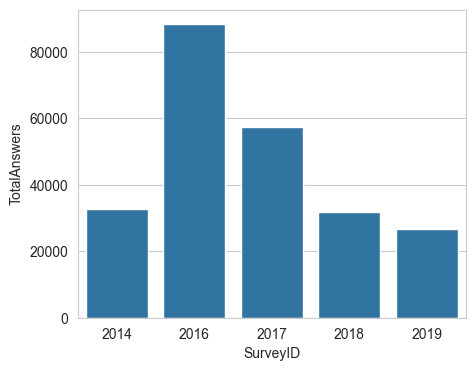

In [17]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=answers_over_time, x='SurveyID', y='TotalAnswers')

The number of replies started at 32760 in 2014, then at 2016, it reached its
 highest at 88238. The replies since then, have decreased reaching its 
 lowest in 2019. 
 Let's investigate what is happening with the number of replies. Is it the 
 number of users going  down? Is it the number of questions per survey going 
 down?

2. How many users have replied for each survey? 

In [18]:
query = '''SELECT SurveyID, COUNT(DISTINCT UserID) AS TotalUsers
 FROM Answer 
 GROUP BY SurveyID;
 ''' 

users_over_time = pd.read_sql_query(query, conn)
users_over_time

,SurveyID,TotalUsers
0,2014,1260
1,2016,1433
2,2017,756
3,2018,417
4,2019,352


<Axes: xlabel='SurveyID', ylabel='TotalUsers'>

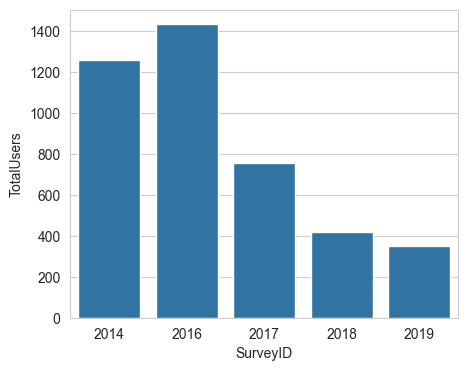

In [19]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=users_over_time, x='SurveyID', y='TotalUsers')

The number of users (people that replied to the survey) are highest in 2016,
 1433 users, and interestingly the second highest in 2014, with 2019 being the 
 lowest with 352 users. 
 The evolution of the number of users and number of replies is more consistent 
 between 2016-2019. 2014 is an outlier.

3. Did all the surveys have the same questions? And how many replies did 
each get?

In [20]:
query = '''SELECT SurveyID, QuestionID, COUNT(1) AS TotalReplies
FROM Answer
GROUP BY SurveyID, QuestionID;
'''

questions_for_each_survey = pd.read_sql_query(query, conn)
questions_for_each_survey

,SurveyID,QuestionID,TotalReplies
0,2014,1,1260
1,2014,2,1260
2,2014,3,1260
3,2014,4,1260
4,2014,5,1260
...,...,...,...
309,2019,85,352
310,2019,86,352
311,2019,87,352
312,2019,88,352


The Surveys do not all have the same questions, although some are in common.

4. Check if all questions had the same amount of replies as the number of 
users.

In [21]:
merged_df = questions_for_each_survey.merge(users_over_time, on='SurveyID')
odd_number_of_replies = merged_df[merged_df.TotalUsers != merged_df
.TotalReplies]
odd_number_of_replies

,SurveyID,QuestionID,TotalReplies,TotalUsers
82,2016,115,2072,1433
83,2016,116,1793,1433
84,2016,117,2692,1433


In [22]:
query = '''SELECT *
FROM Answer
WHERE SurveyID=2016 AND QuestionID BETWEEN 115 AND 117;
'''

pd.read_sql_query(query, conn)

,AnswerText,SurveyID,UserID,QuestionID
0,-1,2016,1261,115
1,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1262,115
2,"Mood Disorder (Depression, Bipolar Disorder, etc)",2016,1262,115
3,-1,2016,1263,115
4,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1264,115
...,...,...,...,...
6552,Other,2016,2689,117
6553,Support,2016,2690,117
6554,Back-end Developer,2016,2691,117
6555,DevOps/SysAdmin,2016,2692,117


In the questions 115-117 from year 2016, several users answered more than 
one times.

5. How many questions did each survey have?

In [23]:
questions_per_survey = questions_for_each_survey.groupby(by='SurveyID').size()
questions_per_survey = questions_per_survey.reset_index()
questions_per_survey.columns = ['SurveyID', 'count']
questions_per_survey

,SurveyID,count
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


<Axes: xlabel='SurveyID', ylabel='count'>

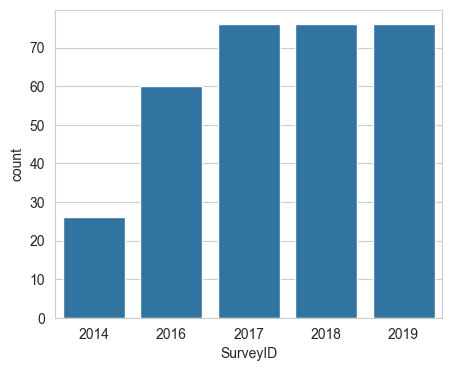

In [24]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=questions_per_survey, x='SurveyID', y='count')

2014 and 2016 both have less questions than the rest. 
Even though, 2014 had many users, it only had around 34% of number of questions 
compared to the surveys 2017-2019, which significantly decreased the amount of
replies it was getting.

6. Any users replied to several surveys ?

In [25]:
query = '''SELECT UserID, COUNT(DISTINCT SurveyID) AS NumberOfSurveys
FROM Answer
GROUP BY UserID
HAVING NumberOfSurveys>1;
'''

pd.read_sql_query(query, conn)

,UserID,NumberOfSurveys


No, all users only appear in one survey.

### 2.1.1 Insights
The surveys are not the same over the years and the sampling population is 
also not the same. 
To analyze the survey replies changes throughout the years, prioritizing our 
analysis to survey questions that were repeatedly asked will help its 
accuracy.

## 2.2 Survey Questions
Objective: 
Find questions that were asked repeatedly in different surveys.

1. Join the table Answer with Question.

In [26]:
query = '''SELECT *
FROM Answer
JOIN Question ON Answer.QuestionID = Question.questionid;
'''

answer_question_merged = pd.read_sql_query(query, conn)
answer_question_merged

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,1
2,32,2014,3,1,What is your age?,1
3,31,2014,4,1,What is your age?,1
4,31,2014,5,1,What is your age?,1
...,...,...,...,...,...,...
236893,Other,2016,2689,117,Which of the following best describes your wor...,117
236894,Support,2016,2690,117,Which of the following best describes your wor...,117
236895,Back-end Developer,2016,2691,117,Which of the following best describes your wor...,117
236896,DevOps/SysAdmin,2016,2692,117,Which of the following best describes your wor...,117


2. Which questions were repeated in the surveys throughout the years ?

In [27]:
query = '''SELECT QuestionID, COUNT(DISTINCT SurveyID) AS 
RepeatedQuestions
FROM Answer
GROUP BY QuestionID;
'''

repeated_questions = pd.read_sql_query(query, conn)
repeated_questions

,QuestionID,RepeatedQuestions
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
100,114,1
101,115,1
102,116,1
103,117,1


<Axes: xlabel='RepeatedQuestions', ylabel='count'>

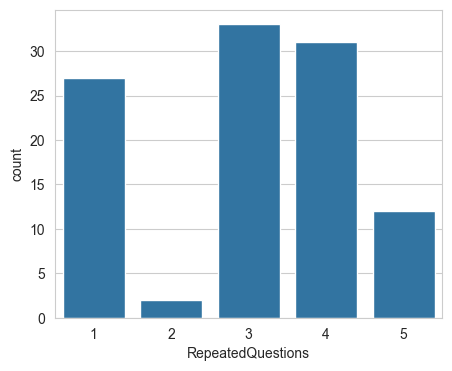

In [28]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.countplot(data=repeated_questions, x='RepeatedQuestions')

3. Which survey did these questions belong to?

In [29]:
questions_for_each_survey[questions_for_each_survey.QuestionID>91]

,SurveyID,QuestionID,TotalReplies
14,2014,92,1260
15,2014,93,1260
16,2014,94,1260
17,2014,95,1260
18,2014,96,1260
19,2014,97,1260
20,2014,98,1260
21,2014,99,1260
22,2014,100,1260
23,2014,101,1260


In [30]:
questions_for_each_survey.SurveyID[(questions_for_each_survey.QuestionID==90)|
(questions_for_each_survey.QuestionID==91)].unique()

array([2014, 2016], dtype=int64)

In [31]:
questions_for_each_survey.SurveyID[(questions_for_each_survey.QuestionID>=57)&
(questions_for_each_survey.QuestionID<=89)].unique()

array([2017, 2018, 2019], dtype=int64)

In [32]:
questions_for_each_survey.SurveyID[(questions_for_each_survey.QuestionID>=13)&
(questions_for_each_survey.QuestionID<=56)].unique()

array([2016, 2017, 2018, 2019], dtype=int64)

Some questions from 2014 lasted until the 2019 survey.
However, a lot from 2014 and 2016 were removed or replaced by new questions. 
2017, 2018 and 2019 share a lot of same questions, let's see if they are the 
same.

4. Did the last 3 surveys have exactly the same questions?

In [33]:
questions_2017 = questions_for_each_survey[questions_for_each_survey['SurveyID'] == 
                    2017]['QuestionID']
questions_2018 = questions_for_each_survey[questions_for_each_survey['SurveyID'] == 2018]['QuestionID']
questions_2019 = questions_for_each_survey[questions_for_each_survey['SurveyID'] == 2019]['QuestionID']


same_questions1718 = set(questions_2017) == set(questions_2018)
same_questions1719 = set(questions_2017) == set(questions_2019)


print("Does 2017 have the same questions as 2018?:", same_questions1718)
print("Does 2017 have the same questions as 2018?:", same_questions1719)

Does 2017 have the same questions as 2018?: True
Does 2017 have the same questions as 2018?: True


The surveys are the same. This will help analysis.

### 2.2.1 Insights
We have located the questions that were repeated in all surveys and the 
surveys 2017, 2018, 2019 are the same. The focus of our analysis will be 
these questions.

# 3. Questions Available In All Surveys - Data Cleaning

In [34]:
combined_df = repeated_questions.merge(question_df, on='QuestionID')
combined_df

,QuestionID,RepeatedQuestions,questiontext
0,1,5,What is your age?
1,2,5,What is your gender?
2,3,5,What country do you live in?
3,4,5,"If you live in the United States, which state ..."
4,5,5,Are you self-employed?
...,...,...,...
100,114,1,Do you think that team members/co-workers woul...
101,115,1,"If yes, what condition(s) have you been diagno..."
102,116,1,"If maybe, what condition(s) do you believe you..."
103,117,1,Which of the following best describes your wor...


In [35]:
questions_in_all_surveys = combined_df[combined_df.RepeatedQuestions==5]
questions_in_all_surveys

,QuestionID,RepeatedQuestions,questiontext
0,1,5,What is your age?
1,2,5,What is your gender?
2,3,5,What country do you live in?
3,4,5,"If you live in the United States, which state ..."
4,5,5,Are you self-employed?
5,6,5,Do you have a family history of mental illness?
6,7,5,Have you ever sought treatment for a mental he...
7,8,5,How many employees does your company or organi...
8,9,5,Is your employer primarily a tech company/orga...
9,10,5,Does your employer provide mental health benef...


In [36]:
query = '''SELECT *
FROM Answer
WHERE QuestionID<12;
'''

answer_df_questions_all_survey = pd.read_sql_query(query, conn)
answer_df_questions_all_survey

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
46393,I don't know,2019,4214,11
46394,-1,2019,4215,11
46395,-1,2019,4216,11
46396,Yes,2019,4217,11


## 3.1 Prepare Datasets
Objective:
Separate the data into one dataset per survey question.
Adjust data of each dataset depending on the type of AnswerText.

Create separate dataframes for each question, so each can be separately 
treated.

In [37]:
questions = []

for i in range(questions_in_all_surveys.QuestionID.size):                             
    query = f'''
    SELECT *
    FROM Answer
    WHERE QuestionID={i+1};
    '''
    question = pd.read_sql_query(query, conn)
    questions.append(question)

### 3.1.1 QuestionID 1

Question 1 answers are numbers but are typed as object. Let's change it to 
numeric.

In [38]:
questions[0]['AnswerText'] = pd.to_numeric(questions[0]['AnswerText'], 
                                            errors='coerce')

The age range is huge, with meaningless min and max values.

In [39]:
questions[0].describe()

,AnswerText,SurveyID,UserID,QuestionID
count,4218.000000,4218.000000,4218.000000,4218.0
mean,33.915363,2016.029872,2109.500000,1.0
std,10.478054,1.587555,1217.776047,0.0
min,-29.000000,2014.000000,1.000000,1.0
25%,28.000000,2014.000000,1055.250000,1.0
50%,33.000000,2016.000000,2109.500000,1.0
75%,38.000000,2017.000000,3163.750000,1.0
max,329.000000,2019.000000,4218.000000,1.0


Since many countries worldwide allow only 14 or above years olds to work, 
any answers under 14 and over 85 are most likely typo or users refusing to 
reveal their age. Therefor are considered None. 

In [40]:
questions[0]['AnswerText'] = (questions[0]['AnswerText']
                                      .apply(lambda x: x if 14<=x<=85 else 
None))

### 3.1.2 QuestionID 2

Answers for this question include 'female', 'male', '-1' and a variety of 
genders. 
Due to the wide range of different answers, '-1' is considered *None*
 and any other than 'female' and 'male' are 'other'.

In [41]:
questions[1]['AnswerText'] = questions[1]['AnswerText'].str.lower()
questions[1]['AnswerText'] = questions[1]['AnswerText'].apply(lambda x: None
if x=='-1' else (x if x in ['female', 'male'] else 'other'))

### 3.1.3 QuestionID 3

Replaced repeated country name written in different formats and considered 
'-1' values as 'None'

In [42]:
questions[2]['AnswerText'] = questions[2]['AnswerText'].replace('-1', None)
questions[2]['AnswerText'] = questions[2]['AnswerText'].replace('United '
                                                                'States', 'United States of America')

### 3.1.4 QuestionID 4

Replaced repeated state names written in different formats and considered 
'-1' values as 'None'

In [43]:
questions[3]['AnswerText'] = questions[3]['AnswerText'].replace('-1', None)
questions[3]['AnswerText'] = questions[3]['AnswerText'].replace('DC', 
                                                                'District of Columbia')

### 3.1.5 QuestionID 5

Consider
-1: None
1: True
0: False

In [44]:
def to_boolean_none(x):
    if x == -1:
        return None 
    elif x == 1:
        return True
    elif x == 0:
        return False
    else:
        return x

questions[4]['AnswerText'] = pd.to_numeric(questions[4]['AnswerText'], 
                                            errors='coerce')
questions[4]['AnswerText'] = (questions[4]['AnswerText'].apply
                              (to_boolean_none))

### 3.1.6 QuestionID 6

Consider
-1: None
Yes: True
No: False

In [45]:
def yes_no_to_boolean(x):
    if x == '-1':
        return None 
    elif x == 'Yes':
        return True
    elif x == 'No':
        return False
    else:
        return x
    
questions[5]['AnswerText'] = (questions[5]['AnswerText'].apply
                              (yes_no_to_boolean))

### 3.1.7 QuestionID 7

Consider
-1: None
1: True
0: False

In [46]:
questions[6]['AnswerText'] = pd.to_numeric(questions[6]['AnswerText'], 
                                            errors='coerce')
questions[6]['AnswerText'] = (questions[6]['AnswerText'].apply
                              (to_boolean_none))

### 3.1.8 QuestionID 8

In [47]:
questions[7]['AnswerText'] = questions[7]['AnswerText'].replace('-1', None)

### 3.1.9 QuestionID 9

Consider
-1: None
1: True
0: False

In [48]:
questions[8]['AnswerText'] = pd.to_numeric(questions[8]['AnswerText'], 
                                            errors='coerce')
questions[8]['AnswerText'] = (questions[8]['AnswerText'].apply
                              (to_boolean_none))

### 3.1.10 QuestionID 10

Consider
-1: None
Yes: True
No: False

In [49]:
questions[9]['AnswerText'] = questions[9]['AnswerText'].replace("Don't "
                                                                "know", "I don't know")
questions[9]['AnswerText'] = (questions[9]['AnswerText'].apply
                              (yes_no_to_boolean))

### 3.1.11 QuestionID 11

Consider
-1: None
Yes: True
No: False

In [50]:
questions[10]['AnswerText'] = (questions[10]['AnswerText'].apply
                              (yes_no_to_boolean))
questions[10]['AnswerText'] = questions[10]['AnswerText'].replace("Don't "
                                                                "know", "I don't know")

### 3.1.12 QuestionID 12

Consider
-1: None
Yes: True
No: False

In [51]:
questions[11]['AnswerText'] = (questions[11]['AnswerText'].apply
                              (yes_no_to_boolean))

## 3.2 Available Data
Objective: Calculate, visualize and understand available data for each 
question.

Calculate available data(answers) for each question.

In [52]:
available_data = [(1 - questions[i]['AnswerText'].isnull().mean()) * 100 for i in range(len(questions))]

QuestionID = [f'{i+1}' for i in range(len(questions))]

available_data_df = pd.DataFrame({
    'QuestionID': QuestionID,
    'Available Data (%)': available_data
})
available_data_df

,QuestionID,Available Data (%)
0,1,99.668089
1,2,99.431010
2,3,99.952584
3,4,61.545756
4,5,99.573257
5,6,100.000000
6,7,100.000000
7,8,88.051209
8,9,88.051209
9,10,88.051209


Plot available data

<Axes: xlabel='Available Data (%)', ylabel='QuestionID'>

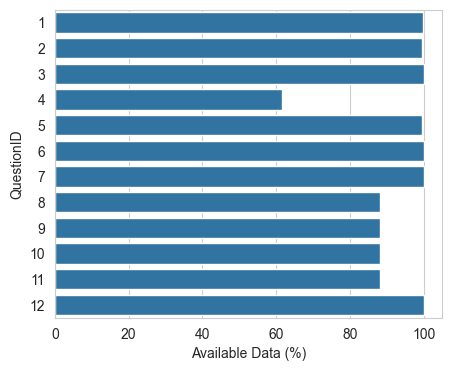

In [53]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=available_data_df, x='Available Data (%)', 
            y='QuestionID')

### 3.2.1 Insights

QuestionID 4 has the most missing data, which is possible due to the nature 
of the question 'If you live in the United States, which state or territory 
do you live in?'. Users who do not live in the US, would have avoided the 
question. 
For the purpose of exploratory data analysis and to avoid bias, missing data
will be preserved in our dataset.

## 3.3 User Description
Objective: 
1. Understand who is answering these surveys, the background of our 
users, from questions ID 1-9. 
2. When applicable, conduct hypothesis testing(null hypothesis) to understand
if our population differs from survey to survey. Important to be able to draw
conclusions about the evolution of replies, as our sampling population and 
sampling size, etc, are different. 
3. Outliers (when applicable)

*All normalized data does not take missing data into consideration. For 
example, if the proportion value is 0.3, it is 30% of available data only.*

**QuestionID 1: What is your age?**

In [54]:
questions[0].describe()

,AnswerText,SurveyID,UserID,QuestionID
count,4204.000000,4218.000000,4218.000000,4218.0
mean,33.851332,2016.029872,2109.500000,1.0
std,8.072537,1.587555,1217.776047,0.0
min,15.000000,2014.000000,1.000000,1.0
25%,28.000000,2014.000000,1055.250000,1.0
50%,33.000000,2016.000000,2109.500000,1.0
75%,38.000000,2017.000000,3163.750000,1.0
max,74.000000,2019.000000,4218.000000,1.0


Visualize the age of our Users in a normalized histogram. Making the shape 
easier to compare between different surveys.

<Axes: xlabel='AnswerText', ylabel='Density'>

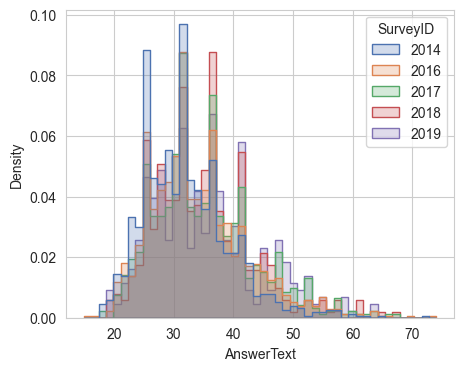

In [55]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
palette = sns.color_palette('deep', n_colors=len(questions[0]['SurveyID']
                                              .unique()))
sns.histplot(data=questions[0], x='AnswerText', hue='SurveyID', 
             palette=palette, element='step', stat='density', common_norm=False)

Boxplot to better visualize outliers

C:\Users\ACER\AppData\Local\Temp\ipykernel_19448\1418695328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=questions[0], x='SurveyID', y='AnswerText', palette=palette)


<Axes: xlabel='SurveyID', ylabel='AnswerText'>

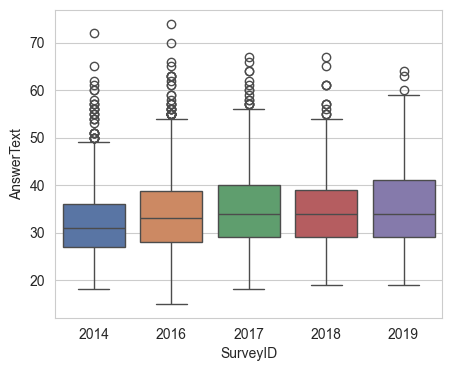

In [56]:
fig, ax =  plt.subplots(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.boxplot(data=questions[0], x='SurveyID', y='AnswerText', palette=palette)

Perform Kruskal-Wallis Test (our data is not normal distribution) to detect 
differences in our population between Surveys.

In [57]:
ages = [group['AnswerText'].dropna().values for name, group in questions[0].groupby('SurveyID')]
stat, p_value = stats.kruskal(*ages)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p_value}")

Kruskal-Wallis test statistic: 98.6781472641197, p-value: 1.8802595299036497e-20


With a H value of 98.678 and p-value close to 0, it is possible to reject 
the null hypothesis and say that the age medians are different from survey 
to survey.
A post-hoc test is needed to check which groups differed.

In [58]:
post_hoc_result = sp.posthoc_dunn(questions[0], val_col='AnswerText', group_col='SurveyID', p_adjust='bonferroni')
post_hoc_result

,2014,2016,2017,2018,2019
2014,1.000000e+00,2.859611e-09,6.242611e-14,8.539474e-10,9.124238e-11
2016,2.859611e-09,1.000000e+00,1.032158e-01,2.720818e-01,4.846197e-02
2017,6.242611e-14,1.032158e-01,1.000000e+00,1.000000e+00,1.000000e+00
2018,8.539474e-10,2.720818e-01,1.000000e+00,1.000000e+00,1.000000e+00
2019,9.124238e-11,4.846197e-02,1.000000e+00,1.000000e+00,1.000000e+00


From our boxplot, 2014 nad 2016 had the largest range of age and also the 
most outliers.

From our pairwise comparison matrix, 2014 significantly differed from all 
other surveys. 2016 differed from 2014 and 2019. While the other 3 are 
statistically the same.

**QuestionID 2: What is your gender?**

In [59]:
def normalized_category(data: pd.DataFrame) -> pd.DataFrame:
    category_counts = (data.groupby(by=['SurveyID', 'AnswerText']).size()
                          .reset_index(name='Counts'))
    total_counts = category_counts.groupby(by='SurveyID')['Counts'].transform('sum')
    category_counts['Proportion'] = category_counts['Counts']/total_counts
    return category_counts
    
def normalized_category_barplot(data: pd.DataFrame, order=None) -> plt.figure:
    category_counts = normalized_category(data)
    fig, ax =  plt.subplots(figsize=(5, 4))
    sns.set_style(style='whitegrid')
    palette = sns.color_palette('deep', n_colors=data['SurveyID']
                                                     .nunique())
    if order is not None: 
        sns.barplot(data=category_counts, x='AnswerText', y='Proportion', 
                    hue='SurveyID', palette=palette, ax=ax, order=order)
    else:
        sns.barplot(data=category_counts, x='AnswerText', y='Proportion', 
                    hue='SurveyID', palette=palette, ax=ax)
    return fig
    

Plot normalized data

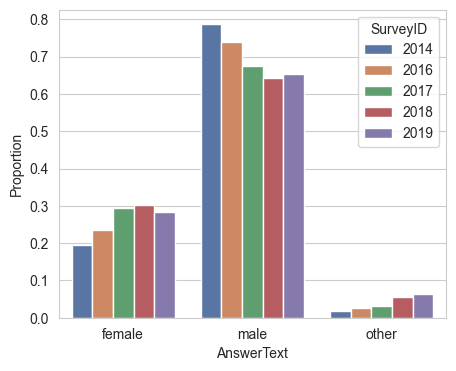

In [60]:
fig_q2 = normalized_category_barplot(data=questions[1])

Given the data we have, without considering the missing values, our sampling
population majority is male in all surveys. 
Perform Chi-Squared Test (categorical data) to understand if there is indeed 
difference between years.

In [61]:
def contingency_table(data: pd.DataFrame) -> pd.DataFrame:
    category_counts = data.groupby(by=['SurveyID', 'AnswerText']).size().unstack(fill_value=0)
    return category_counts

In [62]:
gender_contingency_table = contingency_table(questions[1])
stats.chi2_contingency(gender_contingency_table)

Chi2ContingencyResult(statistic=72.3789274246339, pvalue=1.6488531017637114e-12, dof=8, expected_freq=array([[ 307.63948498,  914.20600858,   38.15450644],
       [ 349.14639962, 1037.55126371,   43.30233667],
       [ 181.40963281,  539.09132093,   22.49904626],
       [ 101.08154506,  300.38197425,   12.53648069],
       [  84.72293753,  251.76943252,   10.50762995]]))

With p-value under 0.05, there is significant difference between surveys. 
Chi-Squared Test does not identify which groups were different. However, by 
visually comparing the barplots, 2014 and 2016 differ the most.

**QuestionID 3: What country do you live in?**

In [63]:
normalized_q3 = normalized_category(data=questions[2])
normalized_q3

,SurveyID,AnswerText,Counts,Proportion
0,2014,Australia,22,0.017460
1,2014,Austria,3,0.002381
2,2014,"Bahamas, The",1,0.000794
3,2014,Belgium,6,0.004762
4,2014,Bosnia and Herzegovina,1,0.000794
...,...,...,...,...
213,2019,Spain,3,0.008523
214,2019,Switzerland,4,0.011364
215,2019,Turkey,3,0.008523
216,2019,United Kingdom,32,0.090909


Most of our Users are live in the United States, followed by the United 
Kingdom and Canada.

**QuestionID 4: If you live in the United States, which state or territory 
do you live in?**

In [64]:
normalized_q4 = normalized_category(questions[3])
normalized_q4

,SurveyID,AnswerText,Counts,Proportion
0,2014,Alabama,8,0.010753
1,2014,Arizona,7,0.009409
2,2014,California,138,0.185484
3,2014,Colorado,9,0.012097
4,2014,Connecticut,4,0.005376
...,...,...,...,...
205,2019,Vermont,1,0.004902
206,2019,Virginia,7,0.034314
207,2019,Washington,13,0.063725
208,2019,Wisconsin,3,0.014706


In [65]:
statemap_gpd = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
statemap_geojson_with_id = statemap_gpd.set_index(keys='GEOID').to_json()

In [66]:
map = folium.Map(location=[35, -100], zoom_start=3)

(folium.Choropleth(geo_data=statemap_geojson_with_id, data=normalized_q4,
                  name="choropleth", columns=['AnswerText', 'Proportion'],
                  key_on='feature.properties.NAME', fill_color='YlGn',
                  fill_opacity=0.7,
                  line_opacity=0.2, legend_name='Proportion of Users Normalized'
                                                'to Total Amount of Users '
                                                'per Survey')
 .add_to (map))

geojson_layer = folium.GeoJson(
    data=statemap_geojson_with_id,
    name='US States',
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black',
                              'weight': 0.5},
    tooltip=GeoJsonTooltip(
        fields=['NAME'],
        aliases=['State: '],
        localize=True,
        sticky=False
    )
).add_to(map)

folium.LayerControl().add_to(map)

map.save("statemap_plot.html")

In [67]:
IFrame("statemap_plot.html", width=700, height=500)

**QuestionID 5: Are you self-employed?**

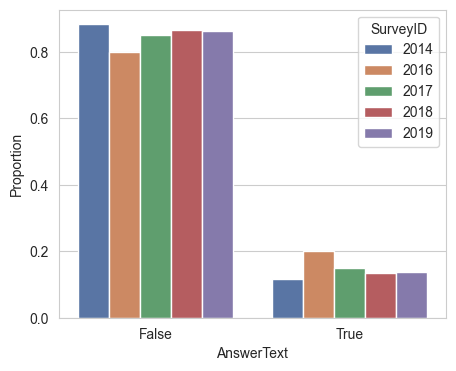

In [68]:
fig_q5 = normalized_category_barplot(questions[4])

Chi-Square Test

In [69]:
stats.chi2_contingency(contingency_table(questions[4]))

Chi2ContingencyResult(statistic=38.250433344329906, pvalue=9.948657936831623e-08, dof=4, expected_freq=array([[1049.78571429,  192.21428571],
       [1211.22619048,  221.77380952],
       [ 639.        ,  117.        ],
       [ 352.46428571,   64.53571429],
       [ 297.52380952,   54.47619048]]))

In general, most of our users are not self-employed. However, with p-value 
of the chi-square test way below 0.05, meaning there is statistically 
significant association between the survey years and the response. By 
visual confirmation, years 2014 and 2016 seem to stand out the most.

**QuestionID 6: Do you have a family history of mental illness?**

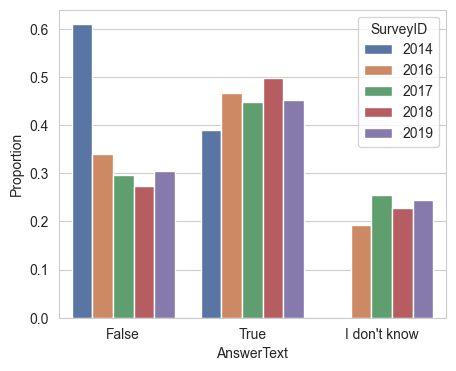

In [70]:
fig_q6 = normalized_category_barplot(questions[5])

Chi-Square Test

In [71]:
stats.chi2_contingency(contingency_table(questions[5]))

Chi2ContingencyResult(statistic=498.6743595767227, pvalue=1.3542047881656054e-102, dof=8, expected_freq=array([[508.12233286, 558.00853485, 193.86913229],
       [577.8883357 , 634.62399241, 220.48767188],
       [304.87339972, 334.80512091, 116.32147937],
       [168.16429587, 184.6742532 ,  64.16145092],
       [141.95163585, 155.88809862,  54.16026553]]))

There was no reply 'I don't know' from 2014, which probably was an option 
only added in year 2016. This could justify the unusually high ratio of 
'False' in the same year. 
However, year by year, there is a visible upwards trend of 'True' and 'I 
don't know', and downwards for 'False'. An increase of awareness in the 
general population on mental health topics might be the reason behind.

**QuestionID 7: Have you ever sought treatment for a mental health disorder 
from a mental health professional?**

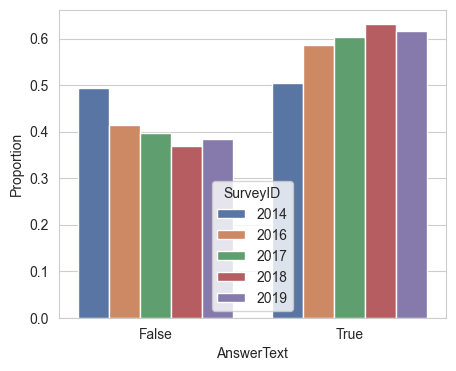

In [72]:
fig_q7 = normalized_category_barplot(questions[6])

Chi-Square Test

In [73]:
stats.chi2_contingency(contingency_table(questions[6]))

Chi2ContingencyResult(statistic=35.496228042053, pvalue=3.673242517487191e-07, dof=4, expected_freq=array([[539.48790896, 720.51209104],
       [613.56045519, 819.43954481],
       [323.69274538, 432.30725462],
       [178.54480797, 238.45519203],
       [150.7140825 , 201.2859175 ]]))

There is an upswing tendency of people who have sought help from a mental 
health professional. This is similar to the situation in question 6. 

**QuestionID 8: How many employees does your company or organization have?**

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '1-5'),
  Text(1, 0, '6-25'),
  Text(2, 0, '26-100'),
  Text(3, 0, '100-500'),
  Text(4, 0, '500-1000'),
  Text(5, 0, 'More than 1000')])

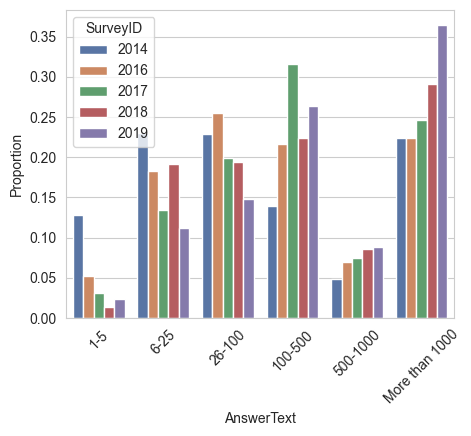

In [74]:
desired_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

category_counts = normalized_category(questions[7])
fig, ax =  plt.subplots(figsize=(5, 4))
sns.set_style(style='whitegrid')
palette = sns.color_palette('deep', n_colors=questions[7]['SurveyID'].nunique())
sns.barplot(data=category_counts, x='AnswerText', y='Proportion', 
            hue='SurveyID', palette=palette, ax=ax, order=desired_order)
plt.xticks(rotation=45)


Our sampling population captures more and more users working in bigger sized
 companies.

**QuestionID 9: Is your employer primarily a tech company/organization?**

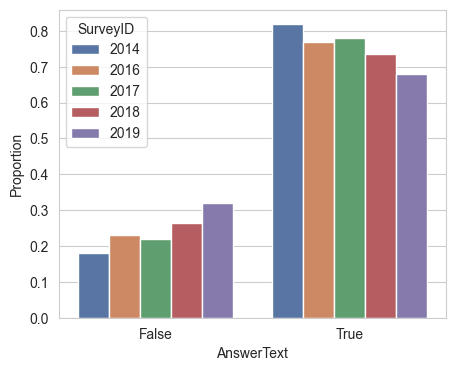

In [75]:
fig_q9 = normalized_category_barplot(questions[8])

Chi-Square Test

In [76]:
stats.chi2_contingency(contingency_table(questions[8]))

Chi2ContingencyResult(statistic=32.28199818965087, pvalue=1.675287286429133e-06, dof=4, expected_freq=array([[280.22617124, 979.77382876],
       [254.8723748 , 891.1276252 ],
       [143.00430802, 499.99569198],
       [ 80.28702208, 280.71297792],
       [ 67.61012386, 236.38987614]]))

More and more of our sampling population are employed by non tech companies.

### 3.3.1 Insights

1. Through chi-square tests conducted in questions about user's personal 
description, the replies from the Survey 2014 differs the largest, followed 
 by 2016. While 2017, 2018 and 2019 are consistently similar. Meaning, 
 possibly the sampling population, specially from year 2014, does not 
 reflect the same target population as other years.

2. It is understood that most of the users are between 28 and 38 years old; 
male; live in the United States; are not self-employed; and work in varied 
sized companies. 

3. There also is an increase through the years in users with families with 
 mental health illness, and users seeking help from mental health
 professionals for a mental health disorder. Possibly due to an increase of 
 social awareness in this aspect. 

4. Other possible factors which could correlate with the increase of users 
seeking for mental health professionals is the industry or gender, as 
these seem to have accompanied the evolution of users seeking help from mental
health professionals.

## 3.4 Mental Health in Companies
Objective:
1. Mental health policies in companies.
2. Understand the general population's perception of their company's stance on 
mental health related topics.
(from questions ID 10-12)
3. Understand if the Tech Industry and gender have an influence. 

*All normalized data does not take missing data into consideration. For 
example, if the proportion value is 0.3, it is 30% of available data only.*

1. Group users into their category 

In [ ]:
female_userID = (questions[1][questions[1]['AnswerText']=='female'].UserID
                 .to_list())
male_userID = questions[1][questions[1]['AnswerText']=='male'].UserID.to_list()
tech_userID = questions[8][questions[8]['AnswerText']==True].UserID.to_list()
non_tech_userID = (questions[8][questions[8]['AnswerText']==False].UserID
                   .to_list())

2. Define data

In [92]:
female_data = []
male_data = []
tech_data = []
non_tech_data = []

for i in range(9, 12):
     data = questions[i][questions[i]['UserID'].isin
     (female_userID)]
     female_data.append(data)
     
for i in range(9, 12):
     data = questions[i][questions[i]['UserID'].isin
     (male_userID)]
     male_data.append(data)    
     
for i in range(9, 12):
     data = questions[i][questions[i]['UserID'].isin
     (tech_userID)]
     tech_data.append(data)
     
for i in range(9, 12):
     data = questions[i][questions[i]['UserID'].isin
     (non_tech_userID)]
     non_tech_data.append(data)

3. Prepare function for plotting

In [104]:
def normalized_category_subplot(data: pd.DataFrame, ax, category: str, 
                                palette):
    category_counts = normalized_category(data)
    sns.barplot(data=category_counts, x='AnswerText', y='Proportion', 
                hue='SurveyID', palette=palette, ax=ax)
    ax.set_title(f'{category} Responses to Question 10')
    ax.set_xlabel('Answer')
    ax.set_ylabel('Proportion')
    ax.tick_params(axis='x', rotation=45)

**QuestionID 10: Does your employer provide mental health benefits as part 
of healthcare coverage?**

([0, 1, 2, 3],
 [Text(0, 0, 'False'),
  Text(1, 0, 'True'),
  Text(2, 0, "I don't know"),
  Text(3, 0, 'Not eligible for coverage / NA')])

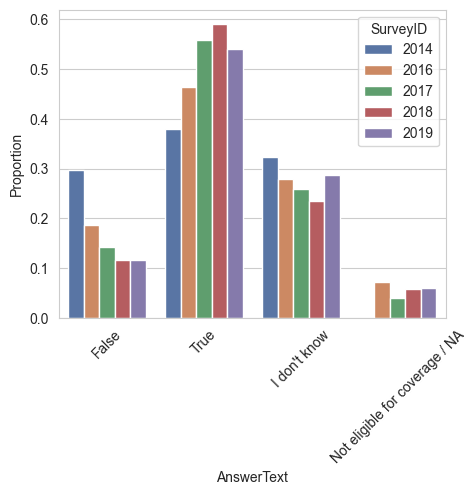

In [77]:
category_counts = normalized_category(questions[9])
fig, ax =  plt.subplots(figsize=(5, 4))
sns.set_style(style='whitegrid')
palette = sns.color_palette('deep', n_colors=questions[9]['SurveyID']
                            .nunique())
sns.barplot(data=category_counts, x='AnswerText', y='Proportion', 
            hue='SurveyID', palette=palette, ax=ax)
plt.xticks(rotation=45)

More and more employers consider mental health benefits as part of 
healthcare coverage.

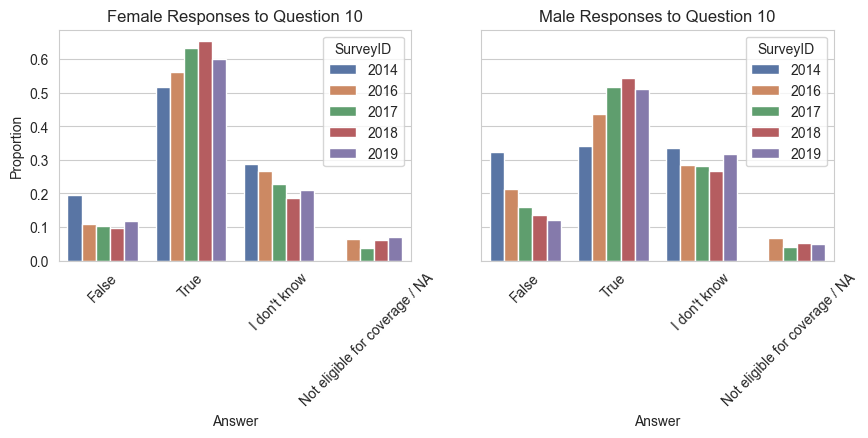

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
palette = sns.color_palette('deep', n_colors=questions[9]['SurveyID'].nunique())
normalized_category_subplot(female_data[0], axes[0], 'Female', palette)
normalized_category_subplot(male_data[0], axes[1], 'Male', palette)

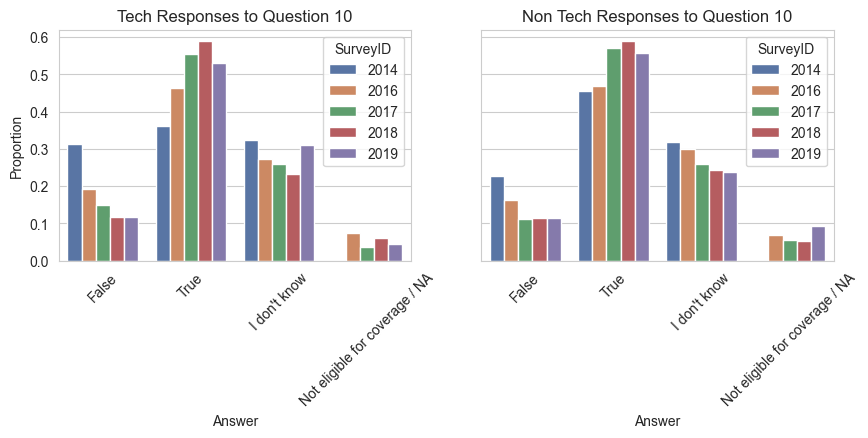

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
palette = sns.color_palette('deep', n_colors=questions[9]['SurveyID'].nunique())
normalized_category_subplot(tech_data[0], axes[0], 'Tech', palette)
normalized_category_subplot(non_tech_data[0], axes[1], 'Non Tech', palette)

**QuestionID 11: Is your anonymity protected if you choose to take advantage
 of mental health or substance abuse treatment resources provided by your 
 employer?**

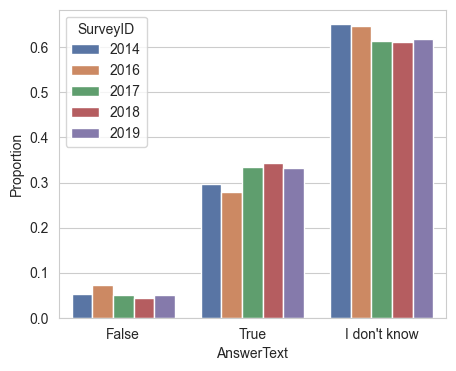

In [78]:
fig_q11 = normalized_category_barplot(questions[10])

Years 2017, 2018 and 2019 have close values and are employers tend to 
respect anonymity more than 2014 and 2016.

**QuestionID 12: Would you bring up a mental health issue with a potential 
employer in an interview?**

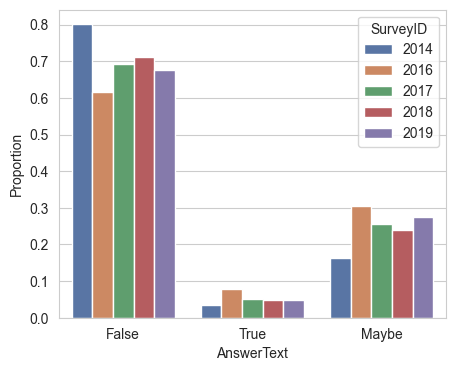

In [79]:
fig_q12 = normalized_category_barplot(questions[11])

Employees in 2014 have the lowest potential of bring up a mental health 
issue in an interview. However, the probability of bringing up such a topic 
remains very low consistently over the years, with years all under 10% and 
over 60% of users choose not to bring up mental health to employers during 
interviews.

### 3.4.1 Insights

1. Regarding the policies of mental health in companies, mental health does 
seem to be more supported in the healthcare coverage, with a small dip in 2019. 
Even when disregarding 2014, as it has a relatively different population 
description, around 20% more users responded positively from 2016 to 2019. 
There is also a slight increase (10% without 2014) in anonymity when mental 
health treatment resources are used.

2. With a substantial amount of users not willing to talk about mental 
health in interviews, shows how the majority of the population do not trust
the employers to be reacting in a fair manner.

3. Also, over 20% of the users didn't know if mental health are included, over 
60% of the users are unsure if employers would respect anonymity. Either the
 topics are unimportant for the users, or the users lack trust to even 
 initiate such a conversation.

**Recommendations:**
-More open conversations and about mental health initiated by the employers.
-Healthcare policies with transparent information about its coverage and 
anonymity treatments to build trust.
-More mental health treatment coverage.

# 4. Correlations with Industry type and Gender
Objective:
1. Understand if the Tech Industry and Gender are associated to the mental 
health quality of users.
2. Analyze more selected questions to deepen the understanding of the users 
opinions, the companies stance on mental health topics, general awareness of
the topic, etc.

*All normalized data does not take missing data into consideration. For 
example, if the proportion value is 0.3, it is 30% of available data only.*

Identify more interesting questions to deepen insights.

In [80]:
other_mental_health_questions = [15, 16, 17, 18, 19, 21, 34, 56, 64, 65, 85]
combined_df[combined_df.QuestionID.isin(other_mental_health_questions)]

,QuestionID,RepeatedQuestions,questiontext
14,15,4,Has your employer ever formally discussed ment...
15,16,4,Does your employer offer resources to learn mo...
16,17,4,If a mental health issue prompted you to reque...
17,18,4,Would you feel comfortable discussing a mental...
18,19,4,Would you feel comfortable discussing a mental...
20,21,4,Do you know local or online resources to seek ...
33,34,4,Have you ever been diagnosed with a mental hea...
42,56,4,Have you observed or experienced an unsupporti...
50,64,3,"Overall, how much importance does your employe..."
51,65,3,"Overall, how much importance does your employe..."


15 - open communication from company (official)
16- transparent meantl health policies and provide help
17- how actually accepting is mental health issues (official)
18, 19- how actually accepting is mental health issues (socially)
21- awareness about mental health issues
34- how many users have a mental health illness diagnosis
56- how much of the fear and lack of trust is based from real experience

2017 onwards
64, 65, 85

## 4.1 Questions 10-12

In [85]:
female_userID = (questions[1][questions[1]['AnswerText']=='female'].UserID
                 .to_list())
male_userID = questions[1][questions[1]['AnswerText']=='male'].UserID.to_list()
tech_userID = questions[8][questions[8]['AnswerText']==True].UserID.to_list()
non_tech_userID = (questions[8][questions[8]['AnswerText']==False].UserID
                   .to_list())

**QuestionID 10: Does your employer provide mental health benefits as part 
of healthcare coverage?**

In [86]:
female_data_10 = questions[9][questions[9]['UserID'].isin(female_userID)]
male_data_10 = questions[9][questions[9]['UserID'].isin(female_userID)]

In [ ]:
category_counts = normalized_category(questions[9])
fig, ax =  plt.subplots(figsize=(5, 4))
sns.set_style(style='whitegrid')
palette = sns.color_palette('deep', n_colors=questions[9]['SurveyID']
                            .nunique())
sns.barplot(data=category_counts, x='AnswerText', y='Proportion', 
            hue='SurveyID', palette=palette, ax=ax)
plt.xticks(rotation=45)

In [87]:
questions[9]

,AnswerText,SurveyID,UserID,QuestionID
0,True,2014,1,10
1,I don't know,2014,2,10
2,False,2014,3,10
3,False,2014,4,10
4,True,2014,5,10
...,...,...,...,...
4213,I don't know,2019,4214,10
4214,None,2019,4215,10
4215,None,2019,4216,10
4216,False,2019,4217,10
